<a href="https://colab.research.google.com/github/zeinebmasmoudi/workshop_FR/blob/main/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Préparation de data

In [10]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image

def load_image(image_path):
    # Check if the file is a GIF
    if image_path.lower().endswith('.gif'):
        # Open the GIF file and extract the first frame
        gif = Image.open(image_path)
        gif = gif.convert('L')  # Convert to grayscale
        img = np.array(gif)
    else:
        # Load non-GIF images using OpenCV
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not load image {image_path}")
    return img

def detect_contour(image):
    if image is None:
        return None

    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) == 0:
        return None

    return max(contours, key=cv2.contourArea)

def reparameterize_contour(contour, num_points=60):
    if contour is None or len(contour) < num_points:
        return None
    contour = contour.squeeze()
    distances = np.cumsum(np.sqrt(np.sum(np.diff(contour, axis=0)**2, axis=1)))
    distances = np.insert(distances, 0, 0)
    total_distance = distances[-1]
    target_distances = np.linspace(0, total_distance, num_points)
    reparam_contour = np.array([np.interp(target_distances, distances, contour[:, i]) for i in range(2)]).T
    return reparam_contour

def save_to_csv(contours_list, csv_file):
    if not contours_list:
        print("No contours to save.")
        return

    # Prepare data with the format "x + y i"
    rows = 60
    data = []

    for i in range(rows):
        row_data = []
        for contour in contours_list:
            x, y = contour[i]
            complex_number = f"{x:.3f} + {y:.3f} i"
            row_data.append(complex_number)
        data.append(row_data)

    # Create headers like "Arbre_1", "Arbre_2", ..., "Arbre_60"
    headers = [f"Marteau{i+1}" for i in range(len(contours_list))]

    df = pd.DataFrame(data, columns=headers)
    df.to_csv(csv_file, index=False)
    print(f"Saved to {csv_file} successfully.")

def process_single_folder(folder_path, output_csv):
    all_contours = []
    for i, filename in enumerate(sorted(os.listdir(folder_path))):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            image_path = os.path.join(folder_path, filename)
            print(f"Processing {image_path}...")

            image = load_image(image_path)
            contour = detect_contour(image)
            if contour is not None:
                contour_points = reparameterize_contour(contour)

                if contour_points is not None:
                    all_contours.append(contour_points)
                else:
                    print(f"Failed to re-parameterize contour for {image_path}")
            else:
                print(f"No valid contour found for {image_path}")

    save_to_csv(all_contours, output_csv)

# Assuming you uploaded `C2_Arbre` directly to `/content`
base_dir = '/content'
folder_name = 'C5_Marteau'
folder_path = os.path.join(base_dir, "C5_Marteau")
output_csv = f"{folder_name}_contours.csv"

# Process the folder
process_single_folder(folder_path, output_csv)


Processing /content/C5_Marteau/hammer-1.gif...
Processing /content/C5_Marteau/hammer-10.gif...
Processing /content/C5_Marteau/hammer-11.gif...
Processing /content/C5_Marteau/hammer-12.gif...
Processing /content/C5_Marteau/hammer-13.gif...
Processing /content/C5_Marteau/hammer-14.gif...
Processing /content/C5_Marteau/hammer-15.gif...
Processing /content/C5_Marteau/hammer-16.gif...
Processing /content/C5_Marteau/hammer-2.gif...
Processing /content/C5_Marteau/hammer-3.gif...
Processing /content/C5_Marteau/hammer-4.gif...
Processing /content/C5_Marteau/hammer-5.gif...
Processing /content/C5_Marteau/hammer-6.gif...
Processing /content/C5_Marteau/hammer-7.gif...
Processing /content/C5_Marteau/hammer-8.gif...
Processing /content/C5_Marteau/hammer-9.gif...
Saved to C5_Marteau_contours.csv successfully.


Crimmins Invariant (Magnitude): 8847.742749493553
Crimmins Invariant (Phase): -3.4519446455312908
Ghorbel Invariant (Magnitude): 7024320.000000002
Ghorbel Invariant (Phase): 55.09073329001714


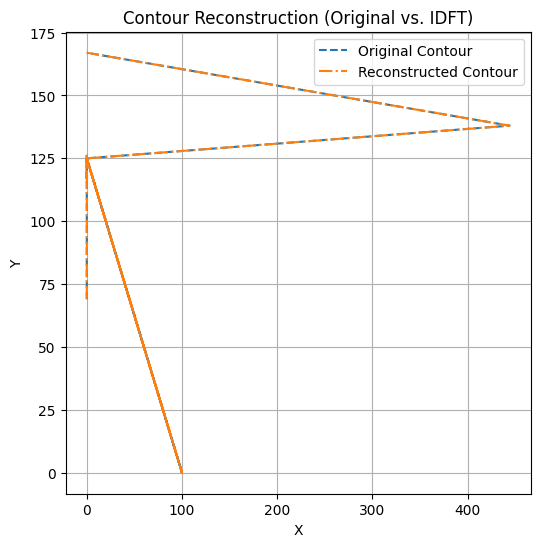

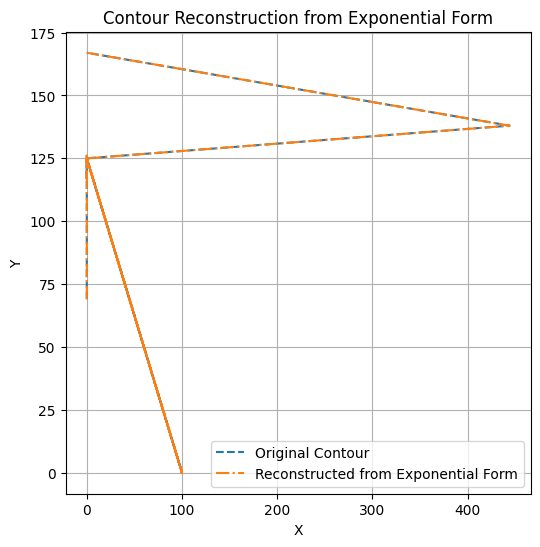

r_1: 1857.2291188757517, θ_1: 1.2166890963753871
r_2: 500.806990704428, θ_2: 1.1552928827425766
r_3: 541.0623736009516, θ_3: 1.7281692060275868
r_4: 344.34809647348936, θ_4: -3.018265999920277
r_5: 489.6386422659062, θ_5: 2.797881805734882
r_6: 458.32477672599265, θ_6: -2.33769324010721
r_7: 804.1733941233937, θ_7: -1.7601642983255066
r_8: 523.5239889997881, θ_8: -0.3952378982853898
r_9: 453.4313619501853, θ_9: -0.20431586460012127
r_10: 128.0883173166542, θ_10: 0.8975830330429299
r_11: 528.2040400009303, θ_11: 0.9832427516271927
r_12: 423.15770946923766, θ_12: 2.5584792584613107
r_13: 627.9761141954366, θ_13: -3.0858291540918215
r_14: 454.0794424631357, θ_14: -1.4825492816649246
r_15: 416.0734937292459, θ_15: -1.7073109222783354
r_16: 297.6248885990257, θ_16: -0.7979160202695705


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load contour data from CSV file
def load_contour_from_csv(csv_file):
    df = pd.read_csv(csv_file)

    # Extract the complex numbers from the first row (e.g., Arbre_1, Arbre_2, ..., Arbre_60)
    complex_coords = df.iloc[0, :].values

    # Parse the complex numbers (assuming format "x + yi")
    contour = []
    for coord in complex_coords:
        # Remove any spaces, split into real and imaginary parts
        coord = coord.strip().replace('i', '')  # remove 'i' if present
        real, imag = coord.split('+')  # Split into real and imaginary parts

        # Convert to float and create complex number
        real = float(real.strip())
        imag = float(imag.strip()) if imag else 0.0  # Handle case where there is no imaginary part

        contour.append(real + 1j * imag)  # Create the complex number

    return np.array(contour)

# Function to calculate Crimmins and Ghorbel Invariants
def calculate_invariants(contour):
    # Perform DFT on the contour
    F = np.fft.fft(contour)

    # Calculate magnitudes and phases
    magnitudes = np.abs(F)
    phases = np.angle(F)

    # Crimmins Invariants
    I_m = np.sum(magnitudes)  # Sum of magnitudes
    I_p = np.sum(phases)      # Sum of phases

    # Ghorbel Invariants
    I_m_Ghorbel = np.sum(magnitudes**2)  # Sum of squared magnitudes
    I_p_Ghorbel = np.sum(phases**2)      # Sum of squared phases

    return I_m, I_p, I_m_Ghorbel, I_p_Ghorbel

# Function to verify the reconstruction using Inverse DFT
def verify_reconstruction(contour, F):
    reconstructed_contour = np.fft.ifft(F)

    # Plot original and reconstructed contours
    plt.figure(figsize=(6, 6))
    plt.plot(np.real(contour), np.imag(contour), label='Original Contour', linestyle='--')
    plt.plot(np.real(reconstructed_contour), np.imag(reconstructed_contour), label='Reconstructed Contour', linestyle='-.')
    plt.title("Contour Reconstruction (Original vs. IDFT)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to convert to exponential form (r, θ)
def convert_to_exponential(F):
    # Convert Fourier coefficients to polar (r, θ)
    r = np.abs(F)  # Magnitude
    theta = np.angle(F)  # Phase

    # Reconstruct using the exponential form r * exp(iθ)
    reconstructed_F = r * np.exp(1j * theta)

    return r, theta, reconstructed_F

# Example: Process a single CSV file for a shape (e.g., "C2_Arbre_contours.csv")
csv_file = 'C1_Coeur_contours.csv'  # Replace with the correct file path

# Load the contour from CSV
contour = load_contour_from_csv(csv_file)

# Calculate invariants
I_m, I_p, I_m_Ghorbel, I_p_Ghorbel = calculate_invariants(contour)

# Print Crimmins and Ghorbel Invariants
print(f"Crimmins Invariant (Magnitude): {I_m}")
print(f"Crimmins Invariant (Phase): {I_p}")
print(f"Ghorbel Invariant (Magnitude): {I_m_Ghorbel}")
print(f"Ghorbel Invariant (Phase): {I_p_Ghorbel}")

# Perform Inverse DFT to verify the reconstruction
F = np.fft.fft(contour)
verify_reconstruction(contour, F)

# Convert Fourier coefficients to exponential form (r, θ)
r, theta, reconstructed_F = convert_to_exponential(F)

# Optionally, verify the reconstructed contour from exponential form
reconstructed_contour_exp = np.fft.ifft(reconstructed_F)

# Plot the contour reconstructed from the exponential form
plt.figure(figsize=(6, 6))
plt.plot(np.real(contour), np.imag(contour), label='Original Contour', linestyle='--')
plt.plot(np.real(reconstructed_contour_exp), np.imag(reconstructed_contour_exp), label='Reconstructed from Exponential Form', linestyle='-.')
plt.title("Contour Reconstruction from Exponential Form")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Print the r (magnitude) and θ (phase) values for verification
for i in range(len(r)):
    print(f"r_{i+1}: {r[i]}, θ_{i+1}: {theta[i]}")


Crimmins Invariant (Magnitude): 3274.830615564735
Crimmins Invariant (Phase): 3.2463079609259196
Ghorbel Invariant (Magnitude): 4074511.999999999
Ghorbel Invariant (Phase): 49.532319133179705


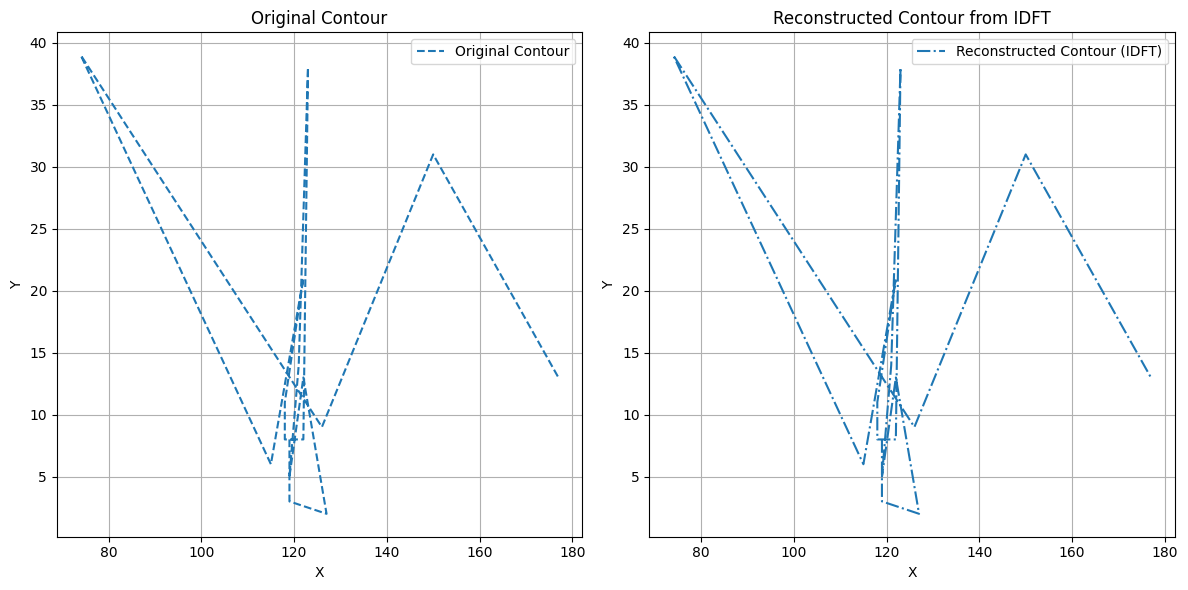

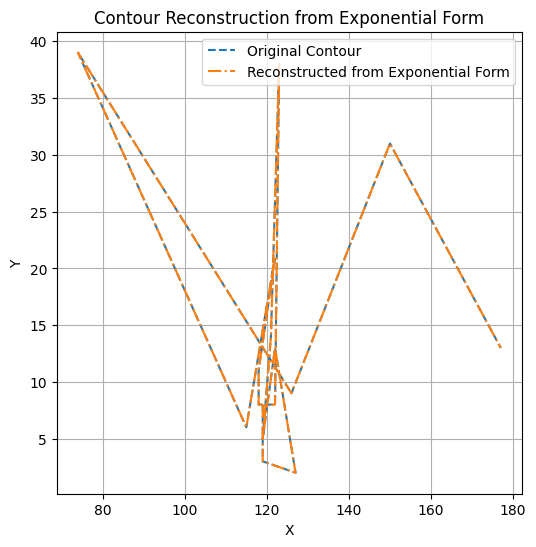

r_1: 1985.2518731888906, θ_1: 0.11560795115536644
r_2: 53.493823522106, θ_2: -0.6185252706047274
r_3: 49.89327571595597, θ_3: 0.999191712824658
r_4: 126.6223896808354, θ_4: 1.5895272507003995
r_5: 97.08243919473799, θ_5: 2.9340964271545906
r_6: 74.972487153793, θ_6: 2.987877217529275
r_7: 45.616003629382924, θ_7: 0.08475232456012725
r_8: 35.62483459232137, θ_8: 1.1083094859883253
r_9: 101.23734488813899, θ_9: 2.3072824840431503
r_10: 103.86416590218126, θ_10: -2.4698581556186716
r_11: 58.79337580315999, θ_11: -2.1260085254206746
r_12: 32.886378098160485, θ_12: 1.2571559581797551
r_13: 122.38055401083948, θ_13: -2.3850881810224225
r_14: 97.92738154573671, θ_14: -1.7785191727593976
r_15: 172.44471639596307, θ_15: -0.6757518869087872
r_16: 116.7395722425315, θ_16: -0.08374165887504693


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load contour data from CSV file
def load_contour_from_csv(csv_file):
    df = pd.read_csv(csv_file)

    # Extract the complex numbers from the first row (e.g., Arbre_1, Arbre_2, ..., Arbre_60)
    complex_coords = df.iloc[0, :].values

    # Parse the complex numbers (assuming format "x + yi")
    contour = []
    for coord in complex_coords:
        # Remove any spaces, split into real and imaginary parts
        coord = coord.strip().replace('i', '')  # remove 'i' if present
        real, imag = coord.split('+')  # Split into real and imaginary parts

        # Convert to float and create complex number
        real = float(real.strip())
        imag = float(imag.strip()) if imag else 0.0  # Handle case where there is no imaginary part

        contour.append(real + 1j * imag)  # Create the complex number

    return np.array(contour)

# Function to calculate Crimmins and Ghorbel Invariants
def calculate_invariants(contour):
    # Perform DFT on the contour
    F = np.fft.fft(contour)

    # Calculate magnitudes and phases
    magnitudes = np.abs(F)
    phases = np.angle(F)

    # Crimmins Invariants
    I_m = np.sum(magnitudes)  # Sum of magnitudes
    I_p = np.sum(phases)      # Sum of phases

    # Ghorbel Invariants
    I_m_Ghorbel = np.sum(magnitudes**2)  # Sum of squared magnitudes
    I_p_Ghorbel = np.sum(phases**2)      # Sum of squared phases

    return I_m, I_p, I_m_Ghorbel, I_p_Ghorbel

# Function to verify the reconstruction using Inverse DFT
def verify_reconstruction(contour, F):
    reconstructed_contour = np.fft.ifft(F)

    # Plot original and reconstructed contours side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot original contour
    axes[0].plot(np.real(contour), np.imag(contour), label='Original Contour', linestyle='--')
    axes[0].set_title('Original Contour')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].grid(True)
    axes[0].legend()

    # Plot reconstructed contour
    axes[1].plot(np.real(reconstructed_contour), np.imag(reconstructed_contour), label='Reconstructed Contour (IDFT)', linestyle='-.')
    axes[1].set_title('Reconstructed Contour from IDFT')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Function to convert to exponential form (r, θ)
def convert_to_exponential(F):
    # Convert Fourier coefficients to polar (r, θ)
    r = np.abs(F)  # Magnitude
    theta = np.angle(F)  # Phase

    # Reconstruct using the exponential form r * exp(iθ)
    reconstructed_F = r * np.exp(1j * theta)

    return r, theta, reconstructed_F

# Example: Process a single CSV file for a shape (e.g., "C2_Arbre_contours.csv")
csv_file = 'C2_Arbre_contours.csv'  # Replace with the correct file path

# Load the contour from CSV
contour = load_contour_from_csv(csv_file)

# Calculate invariants
I_m, I_p, I_m_Ghorbel, I_p_Ghorbel = calculate_invariants(contour)

# Print Crimmins and Ghorbel Invariants
print(f"Crimmins Invariant (Magnitude): {I_m}")
print(f"Crimmins Invariant (Phase): {I_p}")
print(f"Ghorbel Invariant (Magnitude): {I_m_Ghorbel}")
print(f"Ghorbel Invariant (Phase): {I_p_Ghorbel}")

# Perform Inverse DFT to verify the reconstruction
F = np.fft.fft(contour)
verify_reconstruction(contour, F)

# Convert Fourier coefficients to exponential form (r, θ)
r, theta, reconstructed_F = convert_to_exponential(F)

# Optionally, verify the reconstructed contour from exponential form
reconstructed_contour_exp = np.fft.ifft(reconstructed_F)

# Plot the contour reconstructed from the exponential form
plt.figure(figsize=(6, 6))
plt.plot(np.real(contour), np.imag(contour), label='Original Contour', linestyle='--')
plt.plot(np.real(reconstructed_contour_exp), np.imag(reconstructed_contour_exp), label='Reconstructed from Exponential Form', linestyle='-.')
plt.title("Contour Reconstruction from Exponential Form")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Print the r (magnitude) and θ (phase) values for verification
for i in range(len(r)):
    print(f"r_{i+1}: {r[i]}, θ_{i+1}: {theta[i]}")


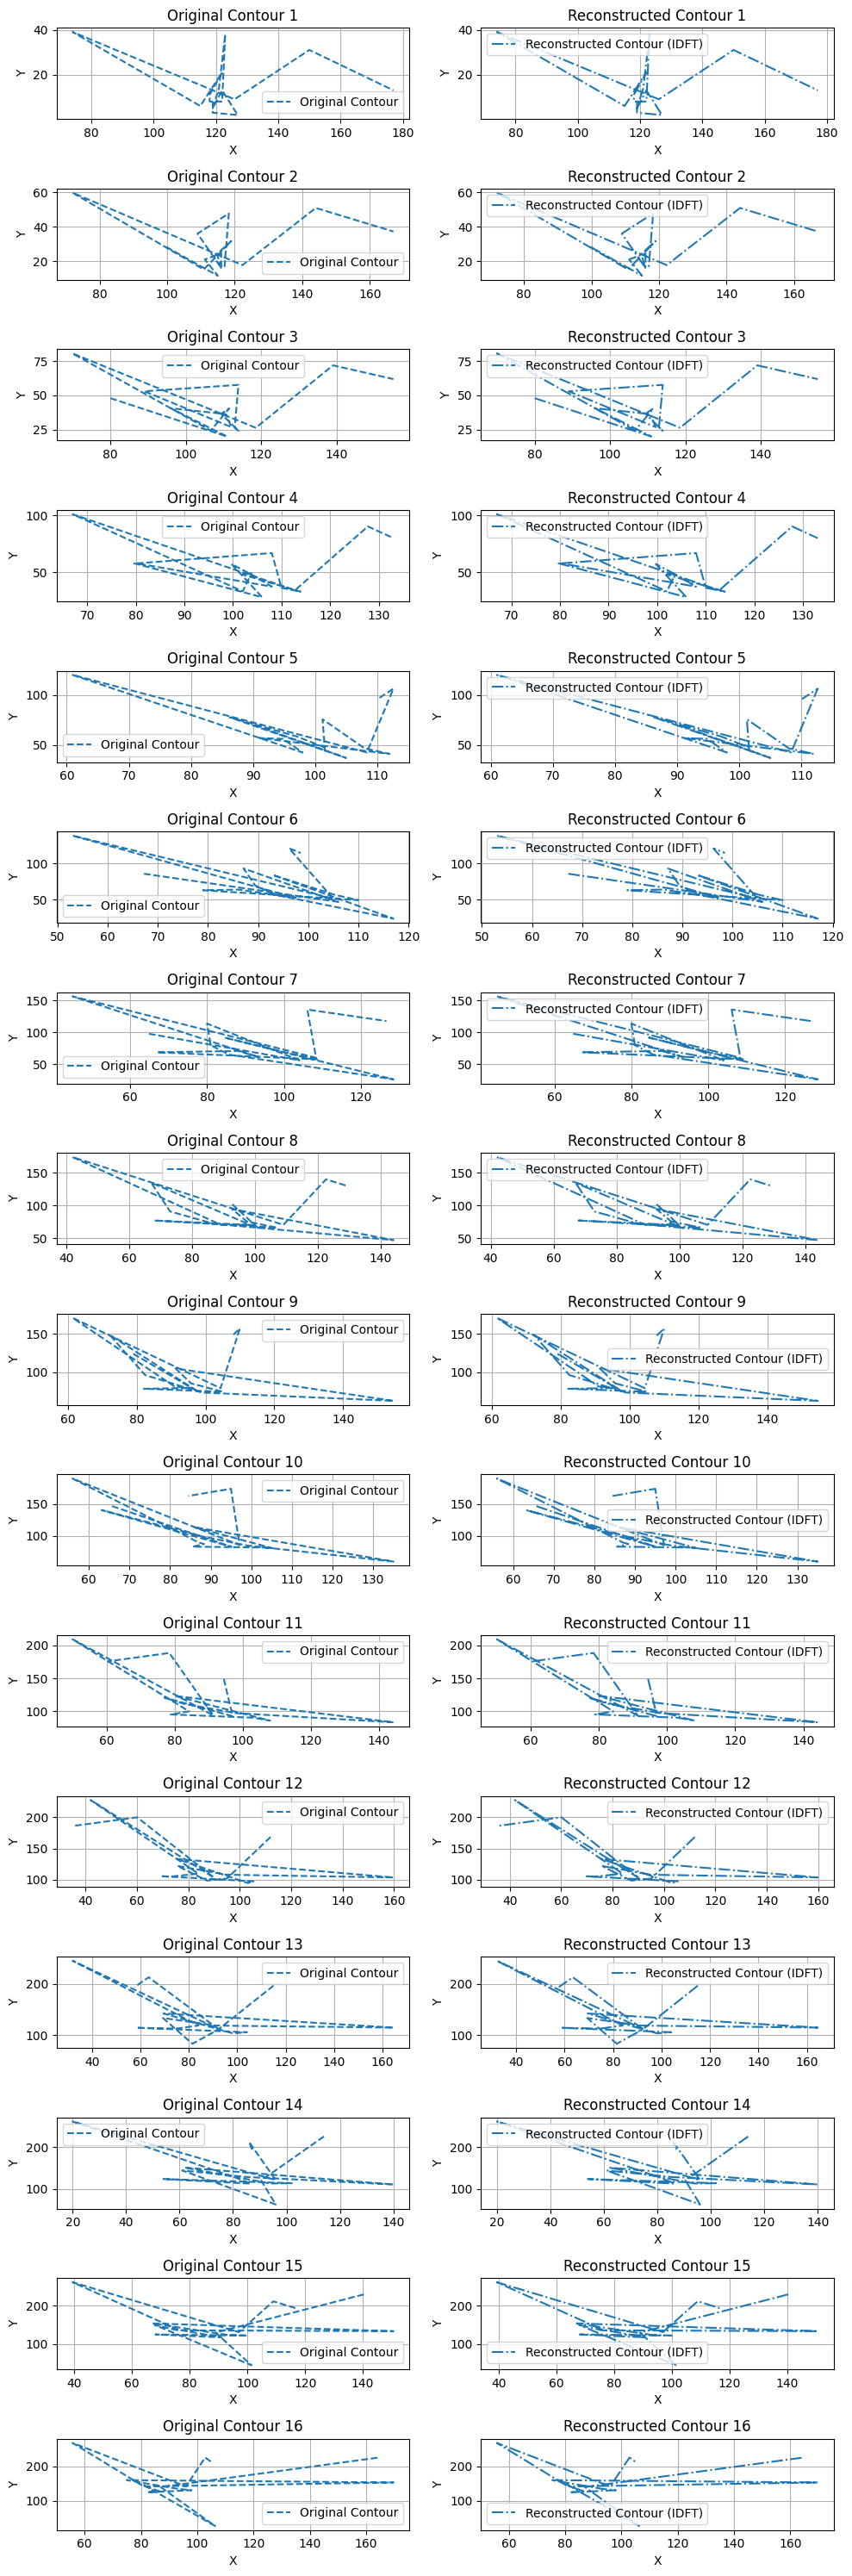

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load contour data from CSV file
def load_contour_from_csv(csv_file):
    df = pd.read_csv(csv_file)

    contours = []
    for i in range(16):  # Assuming there are 16 contours in the CSV
        complex_coords = df.iloc[i, :].values  # Get the i-th contour (row)

        contour = []
        for coord in complex_coords:
            # Remove any spaces, split into real and imaginary parts
            coord = coord.strip().replace('i', '')  # remove 'i' if present
            real, imag = coord.split('+')  # Split into real and imaginary parts

            # Convert to float and create complex number
            real = float(real.strip())
            imag = float(imag.strip()) if imag else 0.0  # Handle case where there is no imaginary part

            contour.append(real + 1j * imag)  # Create the complex number

        contours.append(np.array(contour))

    return contours

# Function to calculate Crimmins and Ghorbel Invariants
def calculate_invariants(contour):
    F = np.fft.fft(contour)  # Perform DFT

    # Crimmins Invariants
    I_m = np.sum(np.abs(F))  # Sum of magnitudes
    I_p = np.sum(np.angle(F))  # Sum of phases

    # Ghorbel Invariants
    I_m_Ghorbel = np.sum(np.abs(F)**2)  # Sum of squared magnitudes
    I_p_Ghorbel = np.sum(np.angle(F)**2)  # Sum of squared phases

    return I_m, I_p, I_m_Ghorbel, I_p_Ghorbel

# Function to verify the reconstruction using Inverse DFT
def verify_reconstruction(contour, F):
    reconstructed_contour = np.fft.ifft(F)
    return reconstructed_contour

# Function to plot 16 original and reconstructed contours
def plot_contours(contours):
    fig, axes = plt.subplots(16, 2, figsize=(10, 30))  # 16 rows, 2 columns

    for i, contour in enumerate(contours):
        # Perform DFT and reconstruction
        F = np.fft.fft(contour)
        reconstructed_contour = verify_reconstruction(contour, F)

        # Plot original contour
        axes[i, 0].plot(np.real(contour), np.imag(contour), label='Original Contour', linestyle='--')
        axes[i, 0].set_title(f'Original Contour {i+1}')
        axes[i, 0].set_xlabel('X')
        axes[i, 0].set_ylabel('Y')
        axes[i, 0].grid(True)
        axes[i, 0].legend()

        # Plot reconstructed contour
        axes[i, 1].plot(np.real(reconstructed_contour), np.imag(reconstructed_contour), label='Reconstructed Contour (IDFT)', linestyle='-.')
        axes[i, 1].set_title(f'Reconstructed Contour {i+1}')
        axes[i, 1].set_xlabel('X')
        axes[i, 1].set_ylabel('Y')
        axes[i, 1].grid(True)
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

# Example: Process a single CSV file for a shape (e.g., "C2_Arbre_contours.csv")
csv_file = 'C2_Arbre_contours.csv'  # Replace with the correct file path

# Load all 16 contours from CSV
contours = load_contour_from_csv(csv_file)

# Plot the original and reconstructed contours for all 16 contours
plot_contours(contours)


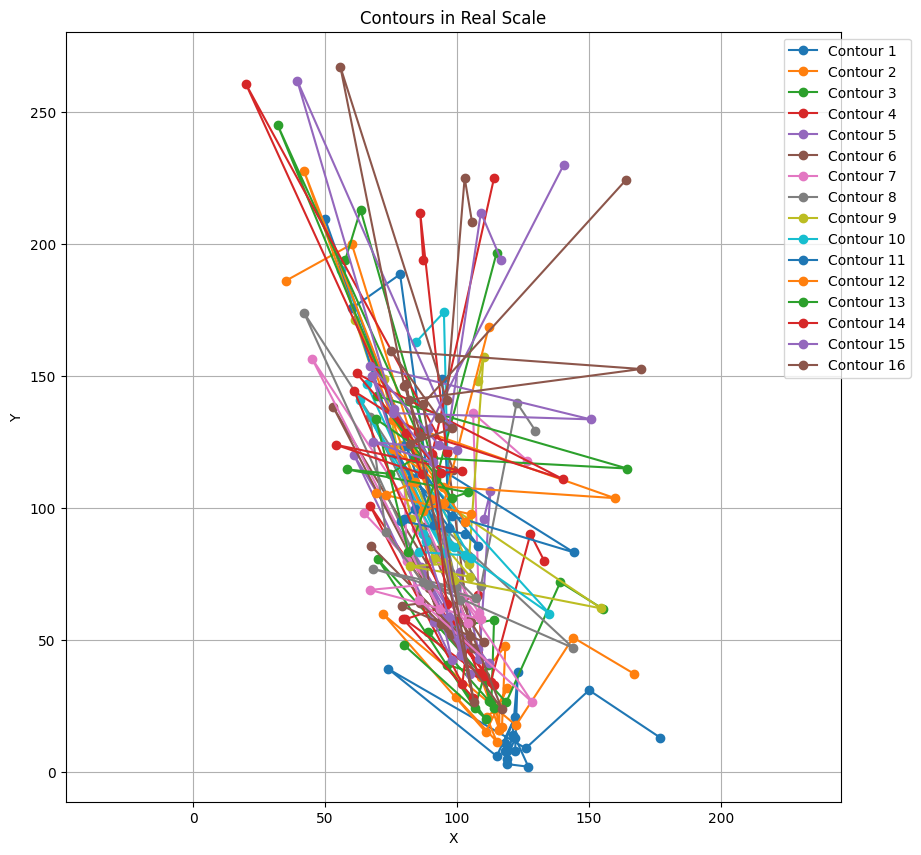

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load contour data from CSV file
def load_contour_from_csv(csv_file):
    df = pd.read_csv(csv_file)

    contours = []
    for i in range(16):  # Assuming there are 16 contours in the CSV
        complex_coords = df.iloc[i, :].values  # Get the i-th contour (row)

        contour = []
        for coord in complex_coords:
            coord = coord.strip().replace('i', '')  # Remove 'i' if present
            real, imag = coord.split('+')  # Split into real and imaginary parts

            # Convert to float and create complex number
            real = float(real.strip())
            imag = float(imag.strip()) if imag else 0.0  # Handle case where there is no imaginary part

            contour.append(real + 1j * imag)  # Create the complex number

        contours.append(np.array(contour))

    return contours

# Function to plot contours in real scale
def plot_contours_in_real_scale(contours):
    plt.figure(figsize=(10, 10))

    # Plot each contour in real scale
    for i, contour in enumerate(contours):
        plt.plot(np.real(contour), np.imag(contour), marker='o', linestyle='-', label=f"Contour {i+1}")

    # Customize the plot
    plt.title("Contours in Real Scale")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
    plt.axis('equal')  # Keep the aspect ratio equal to avoid distortion
    plt.show()

# Example: Process a single CSV file for a shape (e.g., "C2_Arbre_contours.csv")
csv_file = 'C2_Arbre_contours.csv'  # Replace with the correct file path

# Load all 16 contours from CSV
contours = load_contour_from_csv(csv_file)

# Plot contours in real scale
plot_contours_in_real_scale(contours)
